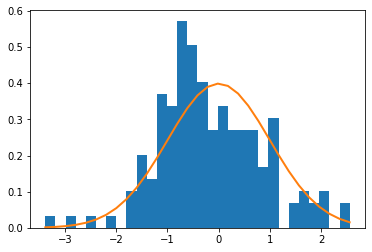

Results:  7
              precision    recall  f1-score   support

           0       0.23      1.00      0.38         7
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         9

    accuracy                           0.23        30
   macro avg       0.08      0.33      0.13        30
weighted avg       0.05      0.23      0.09        30

Results:  8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.27      1.00      0.42         8
           2       0.00      0.00      0.00         5

    accuracy                           0.27        30
   macro avg       0.09      0.33      0.14        30
weighted avg       0.07      0.27      0.11        30

Results:  8
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.27      1.00      0.42         8
           2       0.00      0.00      

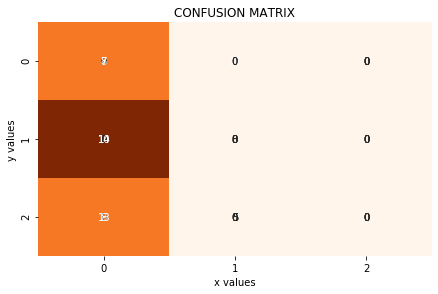

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
import seaborn as sns
import sys
import warnings
warnings.filterwarnings('ignore')
from random import seed


#preprocessing:
    #generate data from gaussian distribution with mean value = 0, standard deviation = 1
    #scale and normalize data
    #verify data

def generate_data(mu, sigma, dp):
    seed(10)
    x1 = np.random.normal(mu, sigma, dp)
    x1 = x1.reshape(-1, 1)
    return x1

def scale_and_normalize_data():
    x_scaler = StandardScaler() 
    x_scaled = x_scaler.fit_transform(x1)
    return x_scaled

def verify_data_on_plot():
    count, bins, ignored = plt.hist(x1, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2)
    plt.show()
    
def generate_classes():    
    seed(1)
    y=np.random.randint(0,3,size=(150,1))
    return y

def compute_for_discriminant_function(X_test, mean_df, sigma, probability):
    first_comp = (X_test*mean_df.iloc[0,0]/sigma)
    second_comp = 0.5*((mean_df.iloc[0,0])**2/sigma**2)
    third_comp = np.log(probability)
    return (first_comp - second_comp + third_comp)

def plot_cm(cnf_matrix, y_test, y_pred, normalize=False):
    cm = confusion_matrix(y_test,y_pred)
    # print(cm)
    ax = sns.heatmap(cm, annot=True, cbar=False, fmt='g', cmap=plt.cm.Oranges)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + .5, top - .5)
    
    plt.tight_layout()
    plt.ylabel('y values')
    plt.xlabel('x values')
    plt.title("CONFUSION MATRIX")
    
def kfold_cross_validation(k, x1, y):
    kf = KFold(n_splits = k, shuffle = True, random_state = None)
    d = []
    for itrain, itest in kf.split(x1,y):
        X_train, X_test = x1[itrain], x1[itest]
        y_train, y_test = y[itrain], y[itest]
        df = pd.DataFrame(np.concatenate((X_train, y_train), axis=1))
        mean_df = df.groupby([1]).mean()
        sigma = np.std(X_train)

        probability_y0 = sum(map(lambda i: i == 0, y_train))/150 
        discriminant_y0 = compute_for_discriminant_function(X_test, mean_df, sigma, probability_y0)
        
        probability_y1 = sum(map(lambda i: i == 1, y_train))/150 
        discriminant_y1 = compute_for_discriminant_function(X_test, mean_df, sigma, probability_y1)
        
        probability_y2 = sum(map(lambda i: i == 2, y_train))/150
        discriminant_y2 = compute_for_discriminant_function(X_test, mean_df, sigma, probability_y2)
    
        y_discriminants = pd.DataFrame(np.concatenate((discriminant_y0, discriminant_y1, discriminant_y2), axis=1))
        imaxval = y_discriminants.idxmax(axis=1)     
        
        res=pd.DataFrame(pd.concat((pd.DataFrame(y_test),imaxval),axis=1))
        res.columns = ['actual_values', 'predicted_values']
        res['matched'] = np.where(res['actual_values'] == res['predicted_values'], 1, 0)

    
        matched=len(res[res['matched']==1])
        y_pred=res.iloc[:,1]
        
        print('Results: ', matched)
        print(classification_report(y_test,y_pred))
    
        cnf_matrix = confusion_matrix(y_test,y_pred)
        plot_cm(cnf_matrix, y_test, y_pred)


if __name__ == '__main__':
    mu = 0; sigma = 1; dp = 150;
    x1 = generate_data(mu, sigma, dp)
    x_scaled = scale_and_normalize_data()
    verify_data_on_plot()
    y = generate_classes()
    kfold_cross_validation(5, x_scaled, y) #calls internally compute_for_discrimination_function
    